In [28]:
%matplotlib inline
import pandas as pd 
import datetime
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from math import pi

In [2]:
troca_persons = pd.read_csv('/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp1-final-set/events.csv',low_memory = False)

In [16]:
#Diversidad de columnas del df
troca_persons.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [17]:
#Previo chequeo de nulos en la columna person:

troca_persons.person.isnull().values.any()

False

## Diversidad de personas 

In [18]:
personas = troca_persons.person.value_counts()
personas

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
25aa4cb5       1
7dd7b2be       1
bfb05658       1
142d70d8       1
068f9114       1
5c61b14a       1
3531c964       1
3680696e       1
2282e818       1
3a3f6b0a       1
dd80f303       1
d57b091b       1
a33b1b4f       1
91e2563e       1
37a61159       1
90c60011       1
ddb0832f       1
1486947d       1
b29ab778       1
b1453674       1
c82d1286       1
61053b3c       1
b766c6bb       1
561b2e95       1
f6d97ad4       1
5ad6e422       1
bec2bbe5       1
b65007ce      

## Diversidad de eventos por persona

In [3]:
# Chequeo de nulos en la columna event
troca_persons.event.isnull().values.any()

False

In [4]:
personasPorEvento = troca_persons[['event','person']]

PPE = personasPorEvento.groupby('person')['event'].count().sort_values(ascending = False).reset_index()

PPE.head(10).person.values


array(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1',
       '5f25cb5d', '5af7e2bc', '3b5a5833', 'd7e60792', 'cd6e0b8d'],
      dtype=object)

## 15 personas con  mas cantidad de eventos

Text(0.5,8.96,'Quince personas con mas eventos')

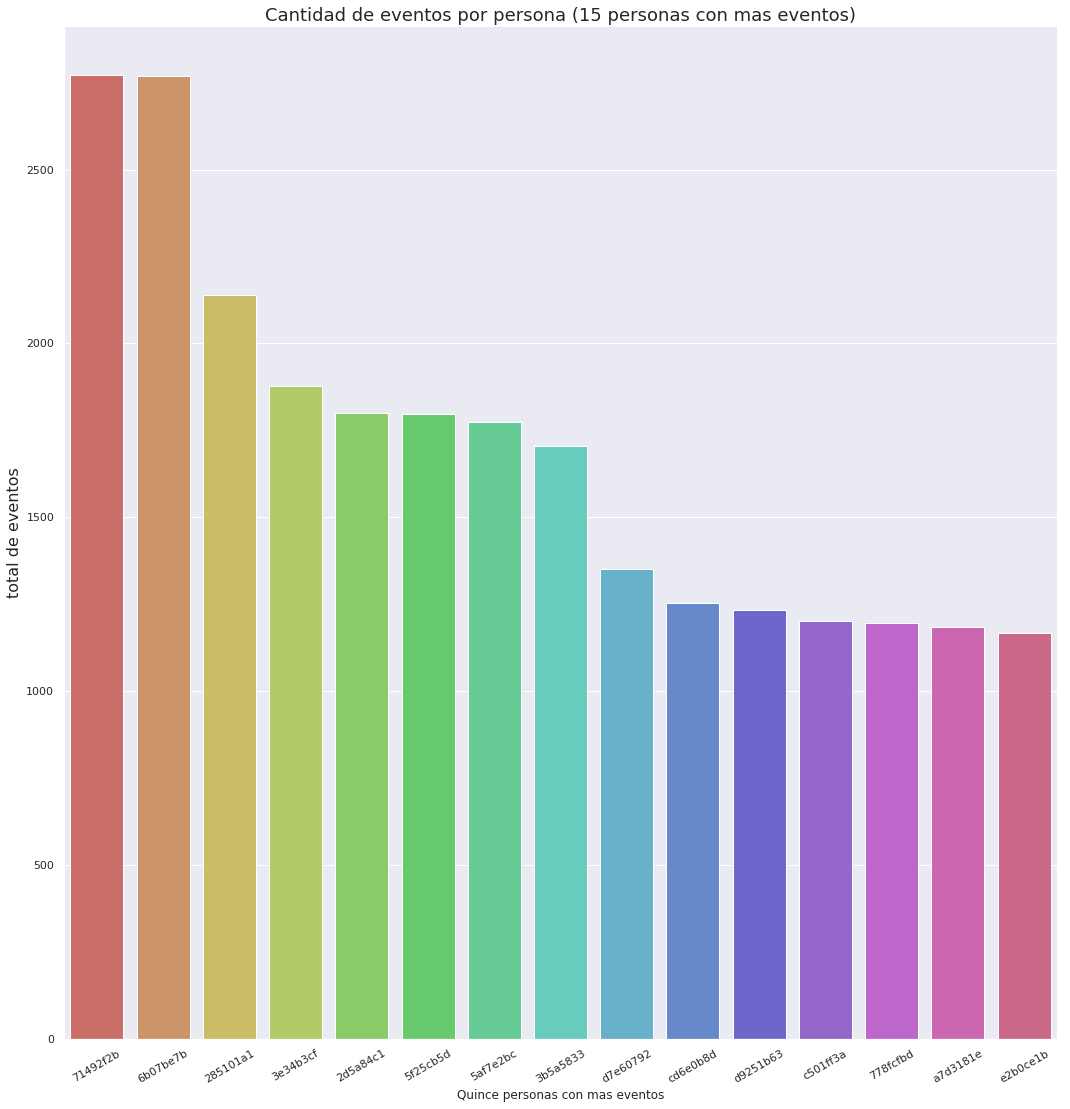

In [271]:
g = sns.catplot(x="person", y="event", kind = "bar", data = PPE.head(15), height = 15,aspect = 1, palette="hls")
g.set_xticklabels(rotation=30)
plt.title('Cantidad de eventos por persona (15 personas con mas eventos)', fontsize = 18)
plt.ylabel('total de eventos', fontsize = 16)
plt.xlabel('Quince personas con mas eventos', fontsize = 12)

## Comparemos las 10 personas con mas eventos

In [7]:
diezPersonasConMasEvents = np.array(PPE.head(10).person.values)
events = troca_persons[troca_persons['person'].isin(diezPersonasConMasEvents)]
events = pd.crosstab(events.person , events.event)
events

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
person,,,,,,,,,,,
285101a1,74,657,7,1,244,0,12,7,0,1077,61
2d5a84c1,61,50,3,0,7,0,6,6,0,1525,142
3b5a5833,33,6,20,0,67,2,25,0,1,1383,168
3e34b3cf,4,36,10,0,141,0,0,59,1,1487,139
5af7e2bc,220,627,4,2,2,1,2,23,7,728,157
5f25cb5d,53,542,3,2,281,1,37,14,32,681,151
6b07be7b,59,780,13,6,424,0,6,87,14,1118,263
71492f2b,61,1149,3,0,71,1,0,15,4,1364,103
cd6e0b8d,19,18,7,0,9,0,3,1,0,1174,23


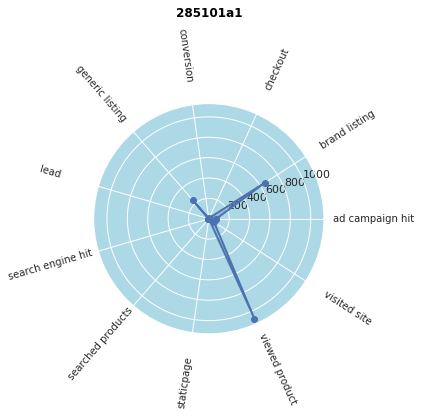

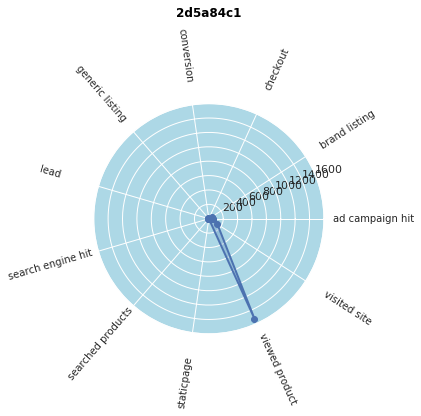

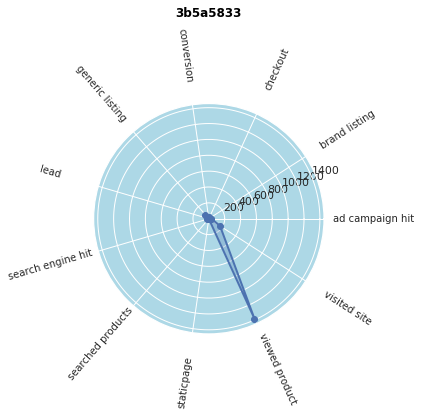

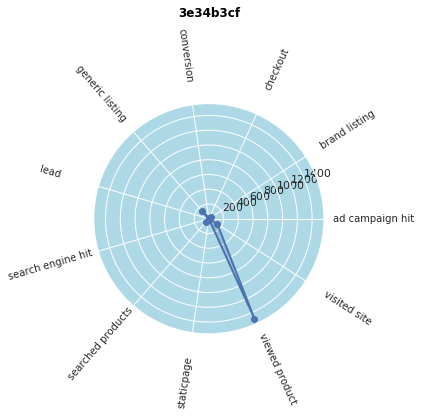

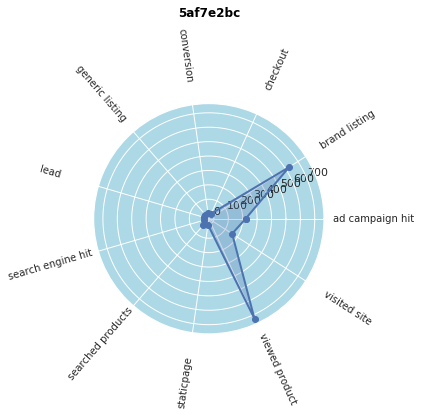

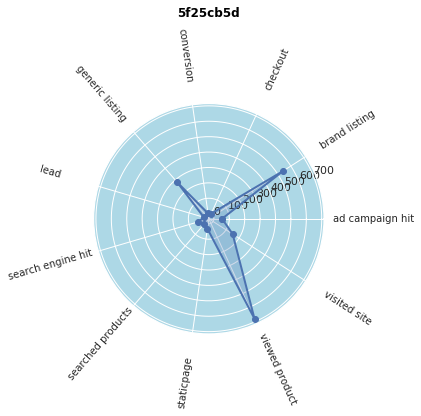

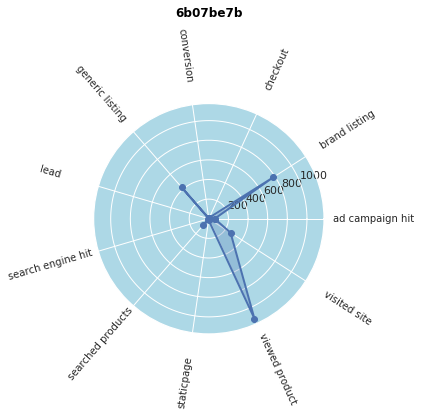

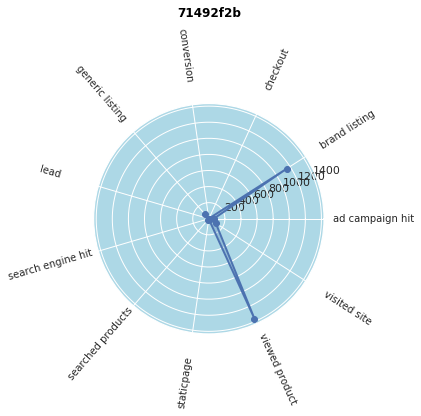

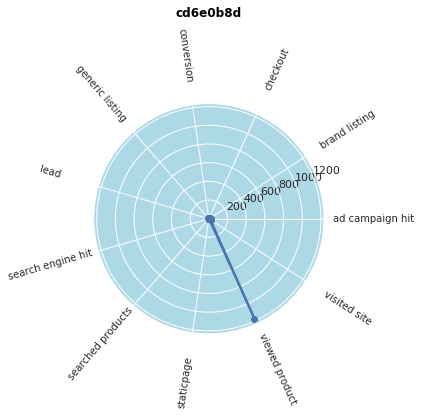

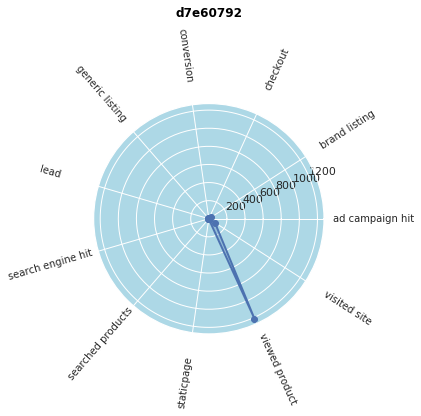

In [10]:

# ------- PARTE 1: Defino una funcion que hace un plot recibiendo etiquetas, los stats de las columnas 
# y el titulo del plot

def hacerRadarChart( labels, stats, nombrePersona):
  
    #Establezco el ángulo de las coordenadadas polares. 
    #Y usamos el np.concatenate para dibujar un recinto cerrado para el radar chart."""
    angles = np.linspace(0,2*np.pi,len(labels), endpoint=False)
    # cerrando el plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Creo una figura
    fig= plt.figure(figsize=(4,4))

    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection='polar', facecolor='lightblue')

    fig.text(0.5, 1.20, nombrePersona,
             horizontalalignment='center', color='black', weight='bold', size='large')

    #Defino metricas de la figura y dibujo el plot
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.set_rmax(1)

    #Grafico el area de stats
    ax.fill(angles, stats, alpha=0.25)

    #Grafico los labels
    ax.set_thetagrids(angles * 180/np.pi, labels)

    #Defino una orientacion diagonal para labels en grados
    ticks= np.linspace(0,360,12)[:-1] 
    #Convierto a radianes
    ax.set_xticks(np.deg2rad(ticks))

    #Redibujo la figura
    plt.gcf().canvas.draw_idle()
    #sumo pi al angulo de cada label si el coseno da negativo(invierte el sentido de la palabra)
    angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
    #Paso radianes a grados
    angles = np.rad2deg(angles)

    #itero sobre dos listas en paralelo: angulos y labels
    for label, angle in zip(ax.get_xticklabels(), angles):
        #obtengo la posicion en x,y de cada label
        x,y = label.get_position()
        #obtengo el label y le aplico una transformacion, cambio la distancia hacia el chart
        lab = ax.text(x,y-0.29, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va())
        #roto el label el angulo obtenido en angles
        lab.set_rotation(angle)

    #Elimino las etiquetas por defecto del chart
    ax.set_xticklabels([])

    ax.grid(True)


# ------- PARTE 2: Aplico la funcion para cada persona

for x in range(0, 10):
    stats = np.array(pd.to_numeric(events.reset_index().iloc[x,1:12].values))
    nombrePersona = events.reset_index().iloc[x,0]
    hacerRadarChart( labels= np.array(events.columns), stats=stats, nombrePersona = nombrePersona)


#### En general se observan muy pocas conversiones ,muchas vistas de productos y bastantes 'brand listing'

## Personas que mas conversiones realizaron en el ultimo trimestre en comparacion con el anterior

In [122]:
#Convierto 'timestamp' a formato fecha 
troca_persons['timestamp'] = pd.to_datetime(troca_persons['timestamp'])

In [123]:
convertidoras = troca_persons[(troca_persons['event'] == 'conversion') & (troca_persons['person'])]
veinteMasCompradoras = convertidoras.groupby('person')['event'].count().sort_values(ascending = False).head(20)


In [205]:
fechaLimite = pd.to_datetime('2018-06-30 23:59:00')

# trimestre
recientes = convertidoras[( fechaLimite - pd.DateOffset(months=6) <= convertidoras.timestamp) 
              & (convertidoras.timestamp <= fechaLimite)]

recientes['trimestre'] = (fechaLimite - casos_recientes['timestamp']) <= pd.Timedelta('90 days')
# Pasaje de boolean a binario
recientes['trimestre'] = 1 * casos_recientes['trimestre']


In [248]:
casos_agrupados = recientes.groupby(['person','event', 'trimestre'])

casos_agrupados = casos_agrupados.agg('size')
casos_agrupados = casos_agrupados.unstack(level="trimestre").fillna(0)
casos_agrupados['resueltosporc'] = casos_agrupados[1] / (casos_agrupados[0] + casos_agrupados[1])
casos_agrupados.sort_values(by = 'resueltosporc',ascending = False)
casos_agrupados = casos_agrupados.unstack(level="event")

#El nombre de personas está en el índice, así que accedemos.
usersTrimestreUltimoMayorPrimero = casos_agrupados[casos_agrupados["resueltosporc"] >= (casos_agrupados[0])]
usersTrimestreUltimoMayorPrimero

trimestre,0,1,resueltosporc
event,conversion,conversion,conversion
person,,,
00204059,NaN,NaN,NaN
00c13dee,0.0,1.0,1.0
00fdbb4b,0.0,1.0,1.0
0146a9df,NaN,NaN,NaN
01db2fe6,NaN,NaN,NaN
02a6f9b5,0.0,1.0,1.0
03bdcd81,NaN,NaN,NaN
042a2a99,0.0,1.0,1.0


In [231]:
#Cantidad de personas que realizaron conversiones en el semestre
(troca_persons[troca_persons['event'] == 'conversion']).groupby('person')['event'].count().size

716

In [234]:
#Cantidad de users que realizaron mas conversiones el ultimo trimestre en relacion al primero
usersTrimestreUltimoMayorPrimero

array(['00204059', '00c13dee', '00fdbb4b', '0146a9df', '01db2fe6',
       '02a6f9b5', '03bdcd81', '042a2a99', '04850add', '04fbc241',
       '0562e9d2', '0585daeb', '058d40c3', '0624fb8e', '06c1730a',
       '06cbe382', '0793fc28', '079f4c7c', '07cd981f', '07ce78e5',
       '07da282e', '08f12b82', '0a37e81a', '0a9153f2', '0a9eddec',
       '0b252419', '0b2bff0b', '0b4e74bb', '0becc3da', '0c22cc51',
       '0cdb8248', '0ce0078d', '0ce82ff6', '0d28270e', '0d8a1ef6',
       '0da63237', '0e1be0d4', '0e392c9e', '0eae7022', '0eb58ffb',
       '0ee60361', '0fb1e967', '0fd11919', '1072db20', '109d6e0b',
       '10e475f9', '1146f7ee', '117f7b9f', '1201fce1', '12518d39',
       '12dbdc4e', '12e5c8ae', '137921cb', '13e22697', '142ed6a4',
       '14669420', '14b57502', '14f3a0aa', '15305691', '156b4ea1',
       '16063b41', '16a8b81a', '16b5abb8', '1744cddc', '17d59b33',
       '18084c3e', '1860d28a', '18afd21f', '18b2e115', '18c1d783',
       '18cf51be', '191e94af', '1963adb6', '196f912b', '19b38b

## Cual es la proporcion de personas en 'Brazil' en el mes de Mayo

In [66]:
#Me quedo con el mes de Mayo
persons1 = troca_persons[(troca_persons['timestamp'].str.contains("2018-05"))]

#Me quedo con Brazil y visited site
persons = persons1[(persons1['event'] == 'visited site') & (persons1['country'] == 'Brazil')]
persons['timestamp'] = pd.to_datetime(persons['timestamp'])

#Saco la cantidad de personas
cantidadDePersonasEnMayoBrazil = persons.groupby('country')['person'].count().values.sum()

#Cantidad de personas total en Mayo
persons2 = persons1[(persons1['event'] == 'visited site')]
totalPersonsEnMayo = persons2.groupby('country')['person'].count().values.sum()

#Saco la proporcion
(cantidadDePersonasEnMayoBrazil / totalPersonsEnMayo)*100

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


96.53187831676509

*Brazil representa el 96% de las visitas al sitio en el mes de mas conversiones*

## Cuales son los dispositivos desde los cuales acceden en Brazil las personas en el mes de Mayo?

In [129]:
disp = persons.groupby('person')['device_type'].value_counts().sort_values(ascending = False)
disp = pd.DataFrame(data = disp)
disp.rename(columns={'device_type': 'cantidad_visitas'}, inplace=True)
disp = disp.reset_index()
dispMay = disp.sort_values(by = 'cantidad_visitas',ascending = False)
dispMay

,person,device_type,cantidad_visitas
0,6b07be7b,Smartphone,142
1,99a7773b,Smartphone,76
2,ca3ff2f0,Computer,73
3,e69addc7,Smartphone,64
4,5f25cb5d,Computer,57
5,5af7e2bc,Computer,56
6,a202cfba,Smartphone,53
7,3e34b3cf,Smartphone,48
8,2eeeadbd,Computer,46
9,74725078,Computer,45


* Se puede observar que el usuario 6b07be7b accedio mayor cantidad de veces desde su smartphone

In [131]:
dispMay.groupby('device_type')['cantidad_visitas'].sum().sort_values(ascending = False)

device_type
Smartphone    19587
Computer      18524
Tablet          572
Unknown          62
Name: cantidad_visitas, dtype: int64

 *En su mayoria acceden desde el smartphone y la computadora*

### Conversiones en funcion del dispositivo utilizado

In [182]:
#Creo un df con las personas que convirtieron en mayo (Brazil)
convMayo =  persons1[(persons1['event'] == 'conversion') & (persons1['person'].isin(dispMay['person'].values))]
conv =  convMayo.groupby('person')['event'].count()
conv = conv.reset_index()
conv.rename(columns={'event': 'cantidad_Conversiones'}, inplace=True)
conv

,person,cantidad_Conversiones
0,02a6f9b5,1
1,042a2a99,1
2,0585daeb,1
3,06c1730a,1
4,08f12b82,1
5,0a37e81a,4
6,0b252419,3
7,0becc3da,1
8,0c22cc51,1
9,0e392c9e,1


In [179]:
#joineo para tener las conversiones por device_type 
nuevoDf = pd.merge(dispMay, conv,on = 'person', how='left').dropna()
nuevoDf

,person,device_type,cantidad_visitas,cantidad_Conversiones
0,6b07be7b,Smartphone,142,1.0
4,5f25cb5d,Computer,57,1.0
5,5af7e2bc,Computer,56,1.0
8,2eeeadbd,Computer,46,1.0
13,3c7691f1,Computer,42,1.0
17,10e475f9,Computer,39,1.0
22,68659ed1,Computer,38,2.0
26,d9251b63,Computer,34,1.0
28,db6f0288,Computer,33,1.0
29,9baae723,Smartphone,31,1.0


Text(0,0.5,'conversiones')

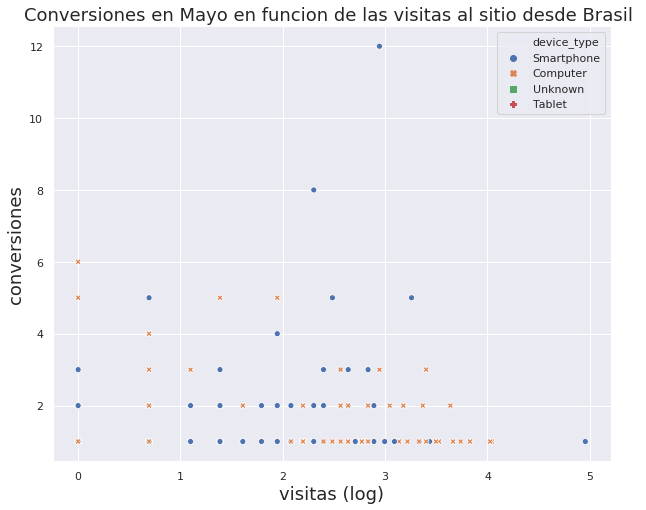

In [178]:
nuevoDf['visitas_log'] = np.log(nuevoDf['cantidad_visitas'])
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x="visitas_log", y="cantidad_Conversiones", hue="device_type",style="device_type",data=nuevoDf,\
                     )
plt.title('Conversiones en Mayo en funcion de las visitas al sitio desde Brasil ', fontsize = 18)
plt.xlabel('visitas (log)',fontsize = 18)
plt.ylabel('conversiones',fontsize = 18)

* Se puede observar que hay pocas conversiones de personas por arriba de 3 y la cantidad de visitas no parece ser un factor que atribuya a la compra de manera que en la mitad de las visitas al sitio se produce la mayor cantidad de conversiones.
* Se puede ver tambien que la mayoria de las convesiones se realizan mediante el smarthphone siguiendole la computadora

## Checkouts vs  conversiones mes de Mayo

In [266]:
check = persons1[persons1['event'] == 'checkout']
cnv = persons1[persons1['event'] == 'conversion']
cnv1 = cnv.groupby('person')['event'].count()
checks = check.groupby('person')['event'].count()


In [267]:
#Dataframe con las personas que convirtieron en Mayo de todos los paises
cnv2 = cnv1.reset_index()
cnv2.rename(columns={'event': 'cantidad_Conversiones'}, inplace=True)
cnv2 = cnv2.sort_values(by='cantidad_Conversiones',ascending = False)

In [273]:
#Dataframe con las personas que realizaron Checkouts en Mayo de todos los paises
checks1 = checks.reset_index()
checks1.rename(columns={'event': 'cantidad_Checkouts'}, inplace=True)
checks1 = checks1.sort_values(by='cantidad_Checkouts',ascending = False)


In [269]:
#hago el left join
checksVsVisits = pd.merge(checks1, cnv2,on = 'person', how='left').dropna()


Text(35.5,0.5,'Conversiones')

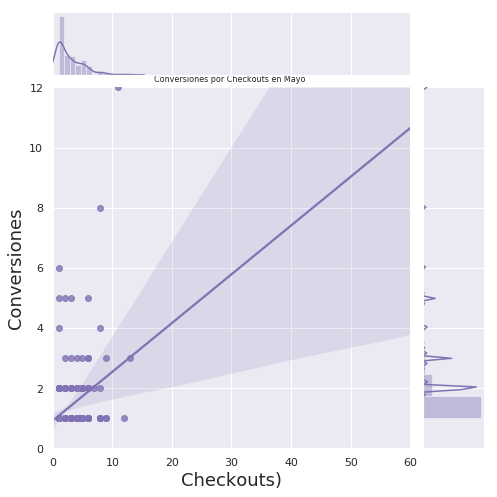

In [272]:

g = sns.jointplot( "cantidad_Checkouts", "cantidad_Conversiones", data=checksVsVisits, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

plt.title('Conversiones por Checkouts en Mayo ', fontsize = 8)
plt.xlabel('Checkouts)',fontsize = 18)
plt.ylabel('Conversiones',fontsize = 18)


* Se observa una gran desviacion de la media entre la cantidad de compra y lo que se lleva al carrito